In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.lines import Line2D 
from collections import Counter
import seaborn as sns

In [2]:
apps = pd.read_csv('AppleStore.csv')
apps_desc = pd.read_csv('apps_desc.csv')
job_skills = pd.read_csv('job_skills.csv')

In [3]:
apps.head(2)

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1


In [4]:
apps.describe()

,Unnamed: 0,id,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
count,7197.000000,7.197000e+03,7.197000e+03,7197.000000,7.197000e+03,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000
mean,4759.069612,8.631310e+08,1.991345e+08,1.726218,1.289291e+04,460.373906,3.526956,3.253578,37.361817,3.707100,5.434903,0.993053
std,3093.625213,2.712368e+08,3.592069e+08,5.833006,7.573941e+04,3920.455183,1.517948,1.809363,3.737715,1.986005,7.919593,0.083066
min,1.000000,2.816565e+08,5.898240e+05,0.000000,0.000000e+00,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000
25%,2090.000000,6.000937e+08,4.692275e+07,0.000000,2.800000e+01,1.000000,3.500000,2.500000,37.000000,3.000000,1.000000,1.000000
50%,4380.000000,9.781482e+08,9.715302e+07,0.000000,3.000000e+02,23.000000,4.000000,4.000000,37.000000,5.000000,1.000000,1.000000
75%,7223.000000,1.082310e+09,1.819249e+08,1.990000,2.793000e+03,140.000000,4.500000,4.500000,38.000000,5.000000,8.000000,1.000000
max,11097.000000,1.188376e+09,4.025970e+09,299.990000,2.974676e+06,177050.000000,5.000000,5.000000,47.000000,5.000000,75.000000,1.000000


In [5]:
apps = apps.drop(['Unnamed: 0'], axis=1)

In [6]:
print('job skill : {}'.format(job_skills.shape))
print('apps desc : {}'.format(apps_desc.shape))
print('apps : {}'.format(apps.shape))

job skill : (1250, 7)
apps desc : (7197, 4)
apps : (7197, 16)


In [98]:
#fungsi visualisasi

def visualizer(x, y, plot_type, title, xlabel, ylabel, rotation=False, rotation_value=60, figsize=(15,8)):
    plt.figure(figsize=figsize)
    
    if plot_type == "bar":  
        sns.barplot(x=x, y=y, color='m')
    elif plot_type == "count":  
        sns.countplot(x)
    elif plot_type == "reg":  
        sns.regplot(x=x,y=y)
    plt.title(title, fontsize=20)
    plt.xlabel(xlabel, fontsize=18)
    plt.ylabel(ylabel, fontsize=18)
    plt.yticks(fontsize=13)
    if rotation == True:
        plt.xticks(fontsize=13,rotation=rotation_value)
    plt.show()

In [81]:
grouped = apps.groupby('prime_genre').id.count().reset_index()
grouped_sorted = grouped.sort_values('id', ascending=False)

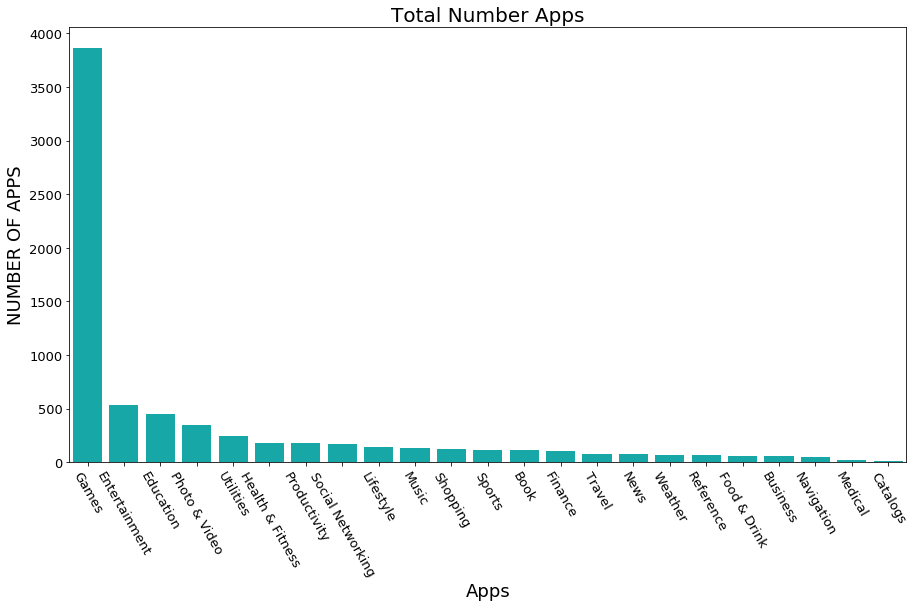

In [94]:
visualizer(grouped_sorted.prime_genre, grouped_sorted.id, "bar","Total Number Apps",
         "Apps", "NUMBER OF APPS", True, -60)

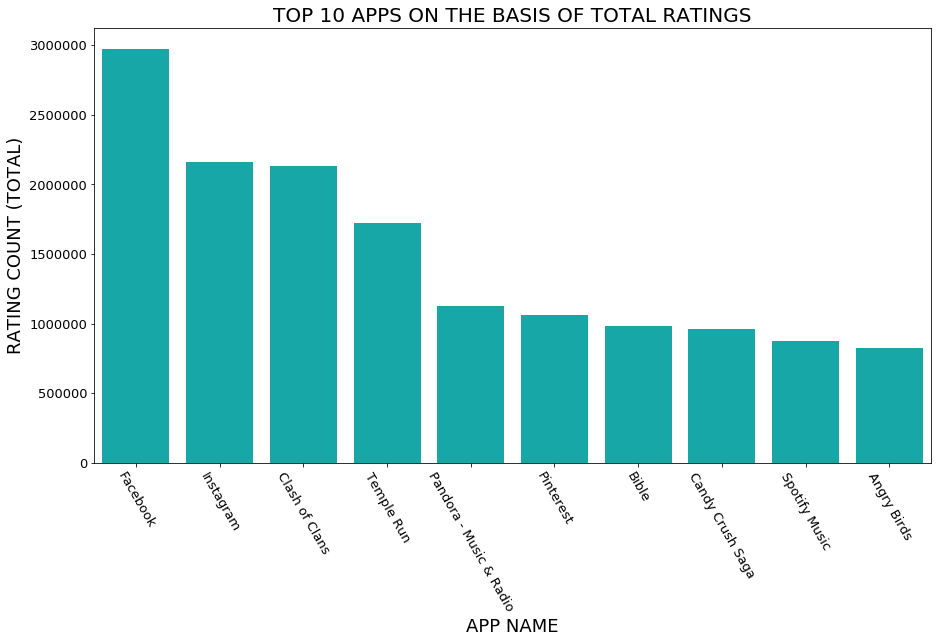

In [95]:
apps_sorted = apps.sort_values('rating_count_tot', ascending=False)
top10_apps_sorted = apps_sorted[:10]

visualizer(top10_apps_sorted.track_name, top10_apps_sorted.rating_count_tot, "bar", "TOP 10 APPS ON THE BASIS OF TOTAL RATINGS",
          "APP NAME", "RATING COUNT (TOTAL)", True, -60)

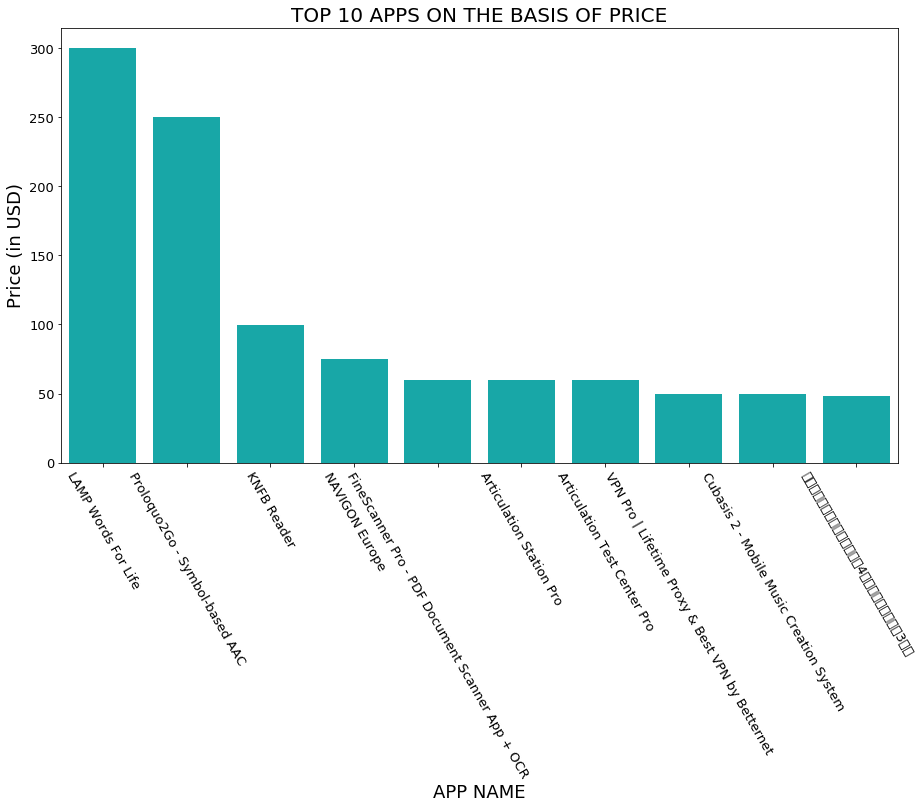

In [96]:
store_data_price = apps.sort_values('price', ascending=False)
subset_store_data_price = store_data_price[:10]

#visualizer(subset_store_data_price.track_name, top10_apps_sorted.rating_count_tot, "bar", "TOP 10 APPS ON THE BASIS OF TOTAL RATINGS",
#          "APP NAME", "RATING COUNT (TOTAL)", True, -60)

visualizer(subset_store_data_price.track_name, subset_store_data_price.price, "bar", "TOP 10 APPS ON THE BASIS OF PRICE",
          "APP NAME","Price (in USD)",True, -60)

In [12]:
corr_store_data = apps.corr()
corr_store_data["rating_count_tot"].sort_values(ascending=False)

rating_count_tot    1.000000
rating_count_ver    0.163645
lang.num            0.137675
user_rating_ver     0.088744
user_rating         0.083310
ipadSc_urls.num     0.015734
sup_devices.num     0.008832
size_bytes          0.004486
vpp_lic            -0.000982
price              -0.039044
id                 -0.201976
Name: rating_count_tot, dtype: float64

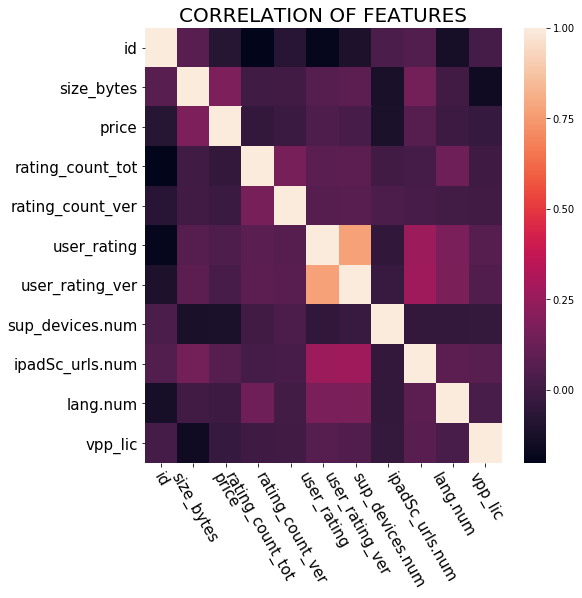

In [13]:
plt.figure(figsize=(8,8))
plt.title("CORRELATION OF FEATURES", fontsize=20)
sns.heatmap(corr_store_data)
plt.xticks(rotation=(-60), fontsize=15)
plt.yticks(fontsize=15)
plt.show()

/Users/adamwidibagaskarta/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


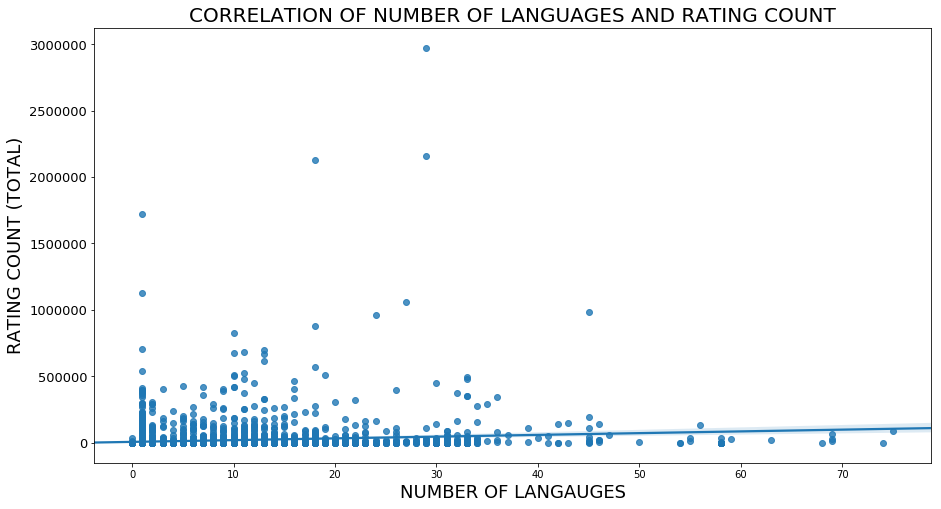

In [14]:
#Inspecting linear correlation of Number of languages and Rating Count (Total)
visualizer(apps['lang.num'], apps['rating_count_tot'], "reg", 
          "CORRELATION OF NUMBER OF LANGUAGES AND RATING COUNT", "NUMBER OF LANGAUGES",
          "RATING COUNT (TOTAL)", False)

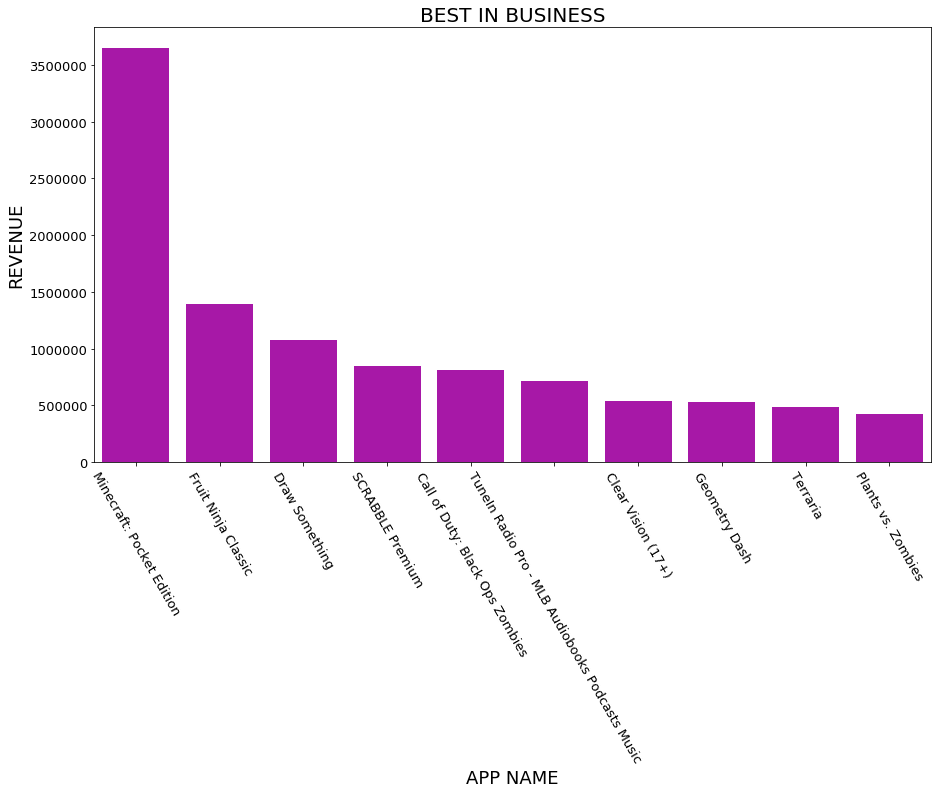

In [99]:
apps['revenue'] = apps.rating_count_tot * apps.price
store_data_business = apps.sort_values("revenue", ascending=False)
subset_store_data_business = store_data_business[:10]

visualizer(subset_store_data_business.track_name, subset_store_data_business['revenue'], "bar", "BEST IN BUSINESS",
         "APP NAME", "REVENUE", True, -60)

In [16]:
def check(x):
    if(x == 0):
        return "free"
    else:
        return "paid"

apps['Status'] = pd.DataFrame(apps.price.apply(lambda x : check(x)))

In [17]:
l = apps.prime_genre.value_counts().index[:4]

def catag(x):
    if x in l:
        return x
    else:
        return "Other"
    
    
apps['broad_genre'] = apps.prime_genre.apply(lambda x: catag(x))

/Users/adamwidibagaskarta/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


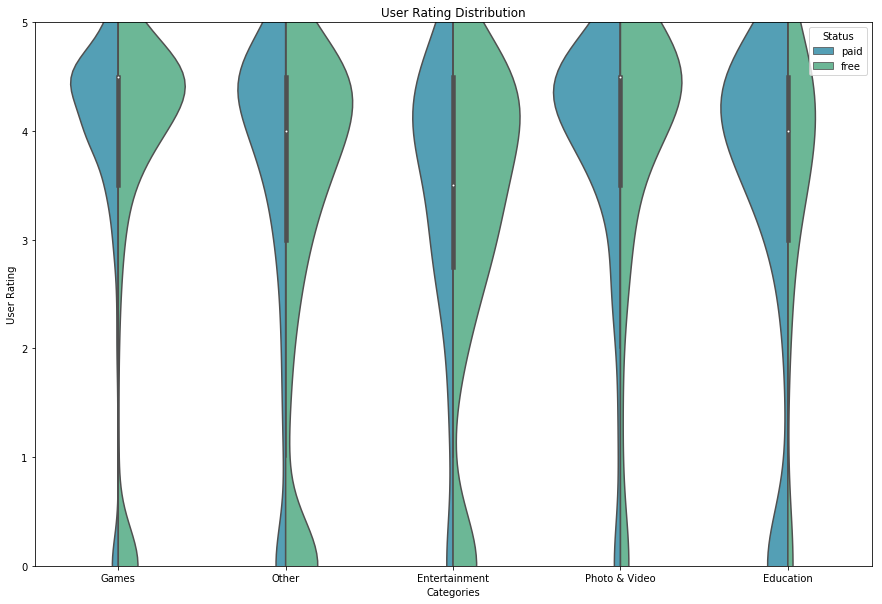

In [18]:
plt.figure(figsize = (15,10))
plt.ylim(0,5)
sns.violinplot(data = apps, y = 'user_rating', x = 'broad_genre',hue='Status',split = True, scale = 'count', palette= ['#44a8c5','#5fc497'] )
plt.style.use("fast")
plt.xlabel('Categories')
plt.ylabel('User Rating')
plt.title('User Rating Distribution')
plt.show()

In [ ]:
job_skills['Company'].value_counts()

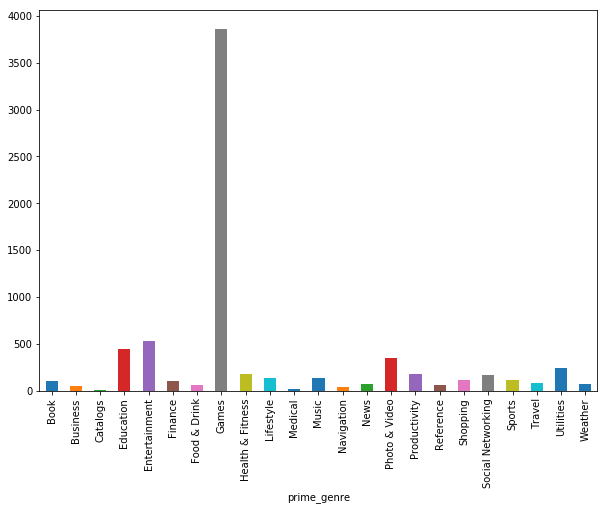

In [59]:
fig = plt.figure(figsize=(10,7))
apps.groupby('prime_genre').id.count().plot.bar()
plt.show()

In [102]:
apps_games = apps[apps['prime_genre'] == 'Games']

In [103]:
apps_games.shape

(3862, 19)

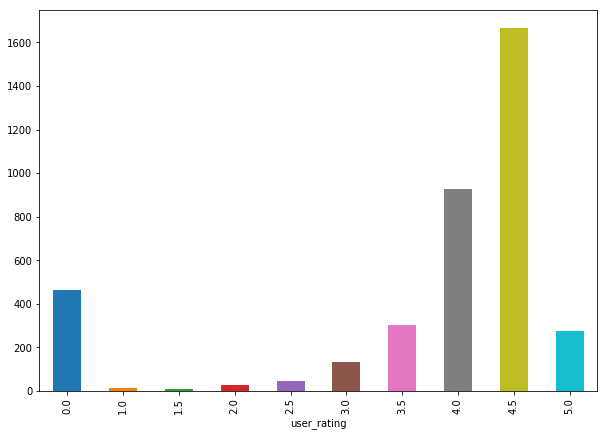

In [104]:
fig_games = plt.figure(figsize=(10,7))
apps_games.groupby('user_rating').id.count().plot.bar(ylim=0)
plt.show()

In [105]:
apps_games_filter = apps_games[(apps_games['price'] > 0) & (apps_games['user_rating'] > 3)]

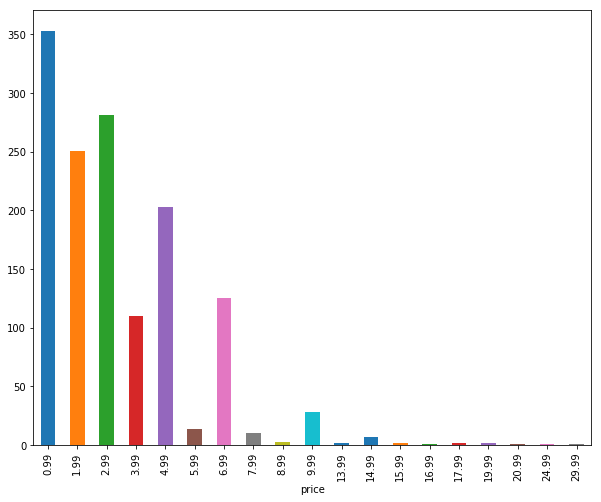

In [106]:
fig_filter = plt.figure(figsize=(10,8))
apps_games_filter.groupby('price').id.count().plot.bar()
plt.show()

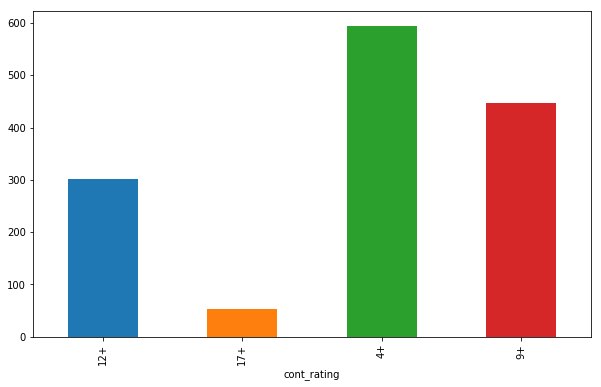

In [107]:
fig_filter = plt.figure(figsize=(10,6))
apps_games_filter.groupby('cont_rating').id.count().plot.bar()
plt.show()

In [108]:
grouped_rating_game = apps.groupby('cont_rating').id.count().reset_index()
grouped_rating_game_sorted = grouped_rating_game.sort_values('id', ascending=False)

In [109]:
grouped_rating_game_sorted

,cont_rating,id
2,4+,4433
0,12+,1155
3,9+,987
1,17+,622


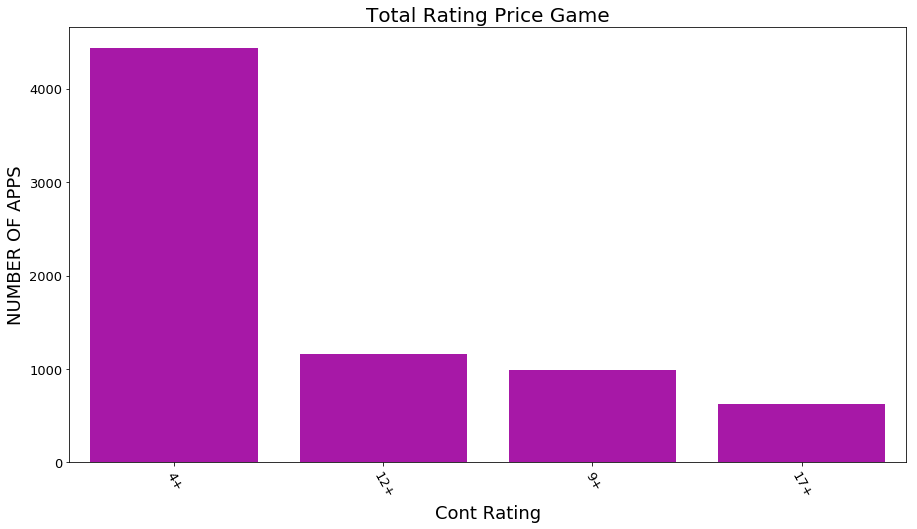

In [111]:
visualizer(grouped_rating_game_sorted.cont_rating, grouped_rating_game_sorted.id, "bar","Total Rating Price Game",
         "Cont Rating", "NUMBER OF APPS", True, -60)